# Report 9: Hybrid evolutionary algorithm

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245

Source code: https://github.com/Oskshust/evo_comp/tree/main/9

## Problem description:

In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The goal is to implement a hybrid evolutionary algorithm (HEA) and compare it with the MSLS, ILS, and LNS
methods implemented in the previous assignments.

## HEA pseudocode

```
TODO
```

Recombination operator 1

```
TODO
```

Recombination operator 2

```
TODO
```

In [1]:
from scripts import *

np.random.seed(123)

a = "../data/TSPA.csv"
b = "../data/TSPB.csv"
c = "../data/TSPC.csv"
d = "../data/TSPD.csv"

breedops 10

Average time per iteration: 114.87812866483415 s
Average iterations: 7.0
Results: 75496.0(75401 - 75591)
Best solution: [0, 1, 4, 5, 6, 8, 11, 14, 15, 19, 20, 21, 22, 26, 31, 32, 36, 37, 41, 43, 45, 48, 50, 51, 53, 55, 59, 61, 62, 64, 66, 71, 72, 74, 75, 76, 77, 79, 80, 81, 87, 88, 91, 92, 94, 95, 96, 98, 101, 106, 108, 109, 111, 112, 113, 114, 117, 119, 121, 126, 127, 128, 130, 132, 134, 135, 137, 141, 143, 144, 145, 147, 149, 152, 153, 154, 155, 156, 157, 159, 160, 163, 164, 167, 169, 171, 172, 174, 177, 178, 180, 185, 186, 189, 190, 192, 194, 195, 198, 199]


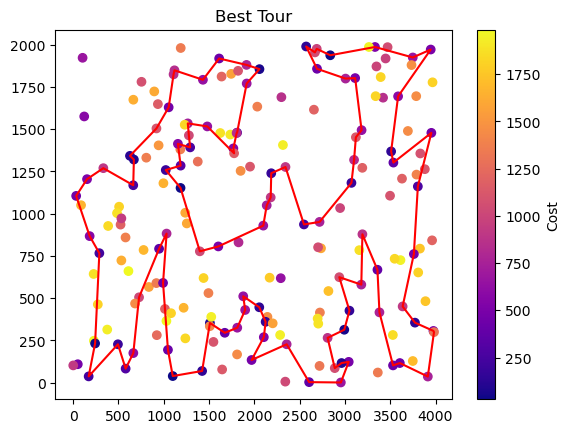

In [2]:
run_hea(a, n_runs=2)

breedops 5

Average time per iteration: 64.80049948078214 s
Average iterations: 11.5
Results: 75583.5(75401 - 75766)
Best solution: [0, 1, 4, 5, 6, 8, 11, 14, 15, 19, 20, 21, 22, 26, 31, 32, 36, 37, 41, 43, 45, 48, 50, 51, 53, 55, 59, 61, 62, 64, 66, 71, 72, 74, 75, 76, 77, 79, 80, 81, 87, 88, 91, 92, 94, 95, 96, 98, 101, 106, 108, 109, 111, 112, 113, 114, 117, 119, 121, 126, 127, 128, 130, 132, 134, 135, 137, 141, 143, 144, 145, 147, 149, 152, 153, 154, 155, 156, 157, 159, 160, 163, 164, 167, 169, 171, 172, 174, 177, 178, 180, 185, 186, 189, 190, 192, 194, 195, 198, 199]


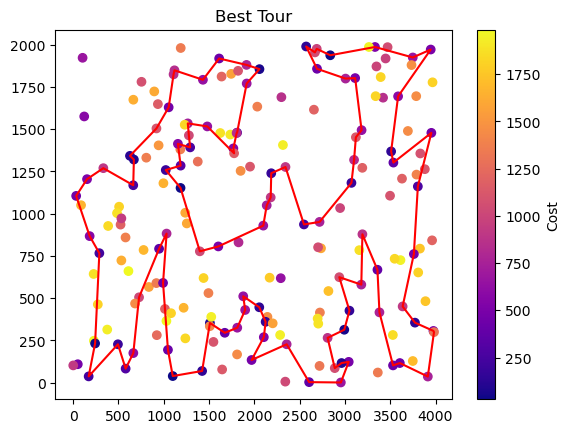

In [2]:
run_hea(a, n_runs=2)

### Objective function values:

| Algorithm | Instance A  | Instance B   | Instance C   | Instance D   |
|-----------|----------|----------|----------|----------|
| MLSL (baseline) | 75093.15(74399 - 75615) | 68222.2(67457 - 68718) |  49098.0(48636 - 49552) | 45526.9(45068 - 46057) |
| ILS | 73835.35(73526 - 74142) | 67134.0(66761 - 67455) | 48226.4(47776 - 49000) | 44217.2(43837 - 44909) |
| LNS | 78267.65(76761 - 79963) | 71671.3(69239 - 75228) | 51772.05(49396 - 53718) | 48516.45(46058 - 50472) |
| LNS_without_LS | 78290.5(76676 - 80016) | 71229.05(69547 - 74454) | 51617.35(50364 - 53947) | 48117.5(45769 - 51529) |
| HEA | avg(min - max) | avg(min - max) | avg(min - max) | avg(min - max) |

### Average time per instance values (in seconds):

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| baseline | 7.146 | 7.249 | 7.368 | 7.092 |
| ILS | 1.680 | 1.741 | 1.746 | 1.761 |
| LNS | 1.790 | 1.535 | 1.521 | 1.419 |
| LNS_without_LS | 0.330 | 0.342 | 0.330 | 0.342 |
| HEA | t | t | t | t |

### Average number of iterations per run for ILS:

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| ILS | 860.0 | 830.0 | 826.2 | 820.8 |
| LNS | 806.5 | 939.4 | 948.45 | 1015.8 |
| LNS_without_LS | 4359.65 | 4204.75 | 4358.9 | 4200.9 |
| HEA | i | i | i | i |

### Conclusions:

TODO